In [105]:
import numpy as np
import math
from scipy.stats import norm
from matplotlib import pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import norm

# Графики функции выплат

Пример 1. Постройте графики функции выплат для опционов колл (покупка, продажа) и пут (покупка, продажа).

In [106]:
def payoff_buy_call(S, K):
    return np.maximum(S - K, 0)

def payoff_buy_put(S, K):
    return np.maximum(K - S, 0)

def payoff_sell_call(S, K):
    return -payoff_buy_call(S, K)

def payoff_sell_put(S, K):
    return -payoff_buy_put(S, K)

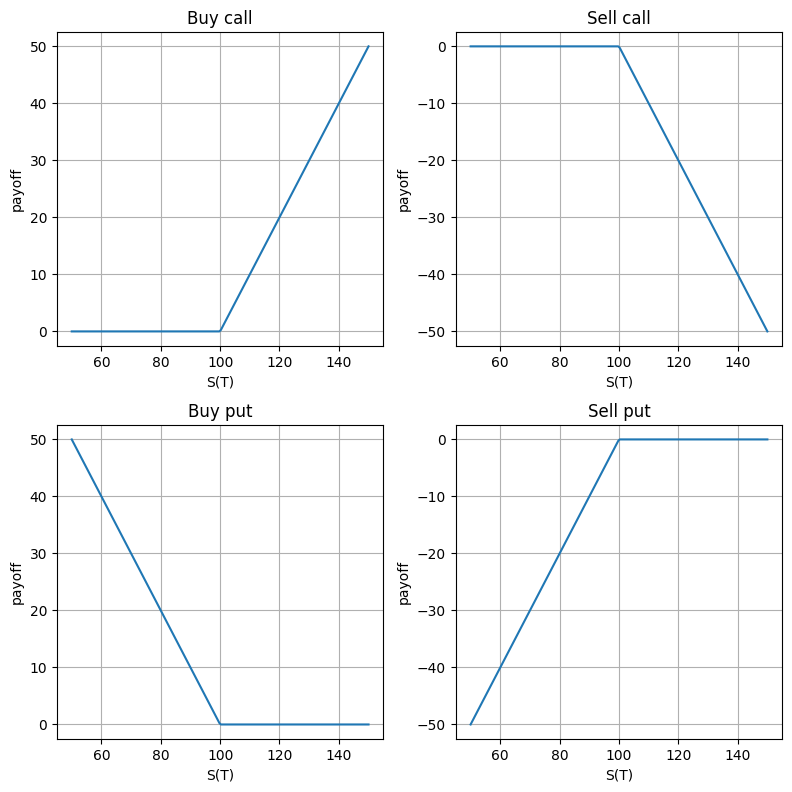

In [107]:
K = 100
S = np.linspace(50, 150, 200)

fig, ax = plt.subplots(2, 2, figsize = (8,8))
ax[0][0].plot(S, payoff_buy_call(S, K))
ax[0][0].set_xlabel("S(T)")
ax[0][0].set_ylabel("payoff")
ax[0][0].grid(True)
ax[0][0].set_title("Buy call")

ax[0][1].plot(S, payoff_sell_call(S, K))
ax[0][1].set_xlabel("S(T)")
ax[0][1].set_ylabel("payoff")
ax[0][1].grid(True)
ax[0][1].set_title("Sell call")

ax[1][0].plot(S, payoff_buy_put(S, K))
ax[1][0].set_xlabel("S(T)")
ax[1][0].set_ylabel("payoff")
ax[1][0].grid(True)
ax[1][0].set_title("Buy put")

ax[1][1].plot(S, payoff_sell_put(S, K))
ax[1][1].set_xlabel("S(T)")
ax[1][1].set_ylabel("payoff")
ax[1][1].grid(True)
ax[1][1].set_title("Sell put")

fig.tight_layout(pad=1.0)

## Задача (Collar)

  Допустим, что текущая цена базового актива равна 70.65, страйки опциона пут и колл равны 65 и 75 соответственно, а оценки их стоимости (премии) равны 2 и 3.25 соответственно. Постройте стратегию, которая заключается в покупке опциона пут и продаже опциона колл.

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии. Постройте график функции выплат для опционной стратегии.

https://blog.quantinsti.com/collar-options-trading-strategy-python/


In [108]:
def payoff(sT, strike_price, premium, option_type, position):
    if option_type == 'call':
        if position == 'long':
            return np.where(sT > strike_price, sT - strike_price, 0) - premium
        elif position == 'short':
            return np.where(sT < strike_price, premium, premium - (sT - strike_price))
        else: 
            print('There is no such call option position')
    elif option_type == 'put':
        if position == 'long':
            return np.where(sT < strike_price, strike_price - sT, 0) - premium
        elif position == 'short':
            return np.where(sT < strike_price, premium + (sT - strike_price), premium)
        else: 
            print('There is no such put option position')
    else: 
        print('There is no such option')

In [109]:
# Цена базового актива
S = 70.65

# Long put
K_long_put = 65
premium_long_put = 2

# Short call
K_short_call = 75
premium_short_call = 3.25

# Stock price range at expiration of the put
sT = np.arange(0,2*S,1)


Max Profit: 66.25
Max Loss: -64.75


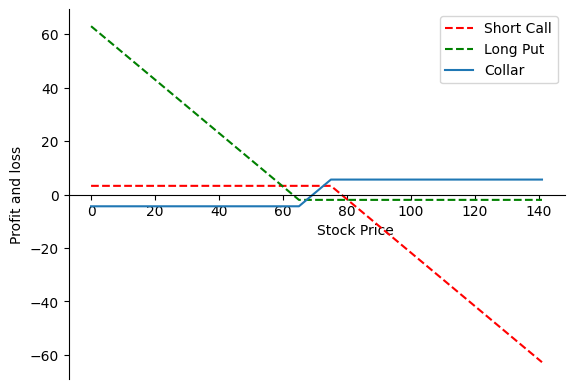

In [110]:
payoff_short_call = payoff (sT, K_short_call, premium_short_call, 'call', 'short')
payoff_long_put = payoff(sT, K_long_put, premium_long_put, 'put', 'long')
payoff_collar = payoff_short_call + payoff_long_put

print ("Max Profit:", max(payoff_collar))
print ("Max Loss:", min(payoff_collar))
# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center

ax.plot(sT,payoff_short_call,'--',label='Short Call',color='r')
ax.plot(sT,payoff_long_put,'--',label='Long Put',color='g')

ax.plot(sT,payoff_collar+sT-S,label='Collar')
plt.xlabel('Stock Price', ha='left')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

## Задача (Long Straddle)

Допустим, что текущая цена базового актива равна 172.5, страйки опциона пут и колл однинаковые и равны 200, а премии опционов равны 29.25 и 0.04 соответственно. Постройте стратегию, которая заключается в покупке опциона пут и покупке опциона колл.

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии. Постройте график функции выплат для опционной стратегии.

https://blog.quantinsti.com/straddle-options-trading-strategy-python/

In [111]:
# Цена базового актива
S = 172.5

# Long put
K_long_put = 200
premium_long_put = 29.25

# Long call
K_long_call = 200
premium_long_call = 0.04

# Stock price range at expiration of the put
sT = np.arange(0,2*S,1)


Max Profit: Unlimited
Max Loss: -29.29


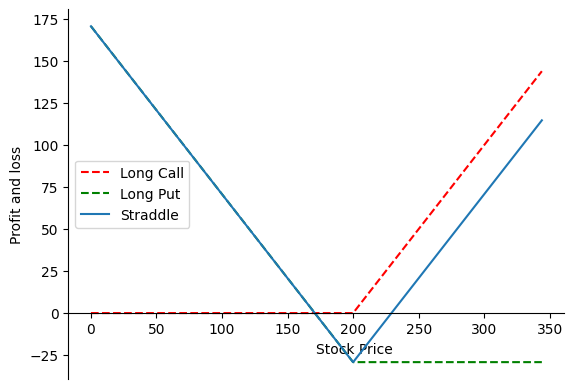

In [112]:
payoff_long_call = payoff (sT, K_long_call, premium_long_call, 'call', 'long')
payoff_long_put = payoff(sT, K_long_call, premium_long_put, 'put', 'long')

payoff_straddle = payoff_long_call + payoff_long_put

print ("Max Profit: Unlimited")
print ("Max Loss:", min(payoff_straddle))
# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center

ax.plot(sT,payoff_long_call,'--',label='Long Call',color='r')
ax.plot(sT,payoff_long_put,'--',label='Long Put',color='g')

ax.plot(sT,payoff_straddle,label='Straddle')
plt.xlabel('Stock Price', ha='left')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

# Биноминальная модель

In [113]:
# plot_binomial_tree: visualisation of the tree and state prices
def plot_binomial_tree(statePrices):
    for i in range(0,n+1):
        for j in range(0,n+1):
            if j>i:
                break
            if i<n:
                x1, y1 = [i, i+1], [2*j-(i-1),2*j+1-(i-1)]
                plt.plot(x1, y1, marker = 'o',color="red")
                x1, y1 = [i, i+1], [2*j-(i-1),2*j-1-(i-1)]
                plt.plot(x1, y1, marker = 'o',color="black")
            plt.text(i-0.2,2*j-(i-1)-0.6,"%.2f" % statePrices["payoff"][i][j])
            plt.text(i-0.2,2*j-(i-1)-1.0,"%.2f" % statePrices["underlying"][i][j],color="blue")
    plt.title("Биноминальное дерево")
    plt.xlabel("p=%.1f%%, u=%.3f, r=%.2f%%, q=%.2f%%, dt=%.2fdays" % (statePrices["p"]*100,
                                                                   statePrices["u"],
                                                                   statePrices["r"]*100,
                                                                   statePrices["q"]*100,
                                                                   statePrices["dt"]*365))
    plt.show()

In [114]:
# binomial_tree_pricer

def binomial_tree_pricer(r, q, sigma, T, n, S, payoff, american=True, showStatePrices=False):
# r: risk neutral rate
# q: dividend yield
# sigma: volatility
# T: maturity in years
# n: number of time steps
# S: spot stock price
# payoff: payoff function e.g.: lambda S: max(S-K,0)
# american: early exercise: True if american, otherwise European
# showStatePrices: print tree probabilities and state prices

    dt = T/n
    up  = np.exp(sigma*np.sqrt(dt))
    p0 = (up * np.exp((r-q) * dt) - 1) / (up**2 - 1)
    p1 = 1 - p0
    df = np.exp(-r * dt)
    # initial values at time T
    statePrices = {"p":p0, "u":up, "r":r, "q":q, "dt":dt}
    if showStatePrices:
        statePrices["payoff"]=np.zeros((n+1,n+1))
        statePrices["underlying"]=np.zeros((n+1,n+1))
    p = np.zeros(n+1)
    for i in range(n+1): # i from 0 to n incl
        p[i] = payoff(S * up**(2*i - n))
        if showStatePrices:
            statePrices["payoff"][n][i] = p[i]
            statePrices["underlying"][n][i] = S * up**(2*i - n)
    # move to earlier times
    for j in range(n-1,-1,-1): # j from n-1 to 0 incl
        for i in range(j+1): # i from 0 to j incl
            # discounted expected value of exdiv price
            p[i] = (p0 * p[i+1] + p1 * p[i])*df
            # american payoff
            if american:
                early_exercise = payoff(S * up**(2*i - j))
                p[i] = max(early_exercise,p[i])
            if showStatePrices:
                statePrices["payoff"][j][i] = p[i]
                statePrices["underlying"][j][i] = S * up**(2*i - j)
    if showStatePrices:
        plot_binomial_tree(statePrices)
    return p[0]

Пример. Текущая цена акций равна 50, волатильность 15%, цена страйк на 1% выше цены базового актива, время до экспирации 1 месяц, безрисковая ставка 5%, на акции начисляются дивиденды 2%. Постройте биноминальное дерево на 5 периодов для европейского опциона пут и оцените его стоимость.

Биноминальное дерево, европейский опцион пут, функция выплат max(K-S, 0)


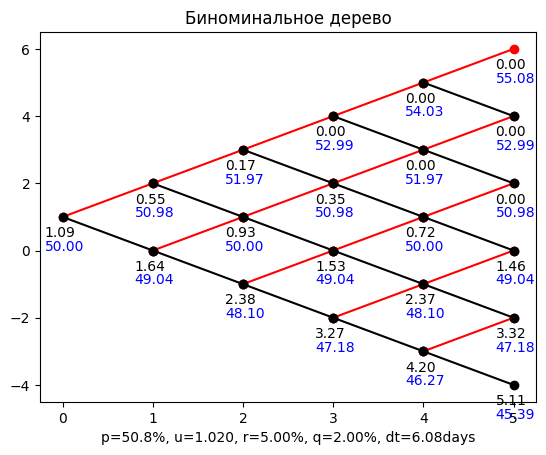

1.0853174417962133

In [115]:
r, q, sigma, T, n, S = 0.05, 0.02, 0.15, 1/12, 5, 50
K = S*1.01
print("Биноминальное дерево, европейский опцион пут, функция выплат max(K-S, 0)")
binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(K-S,0), american=False, showStatePrices=True)

## Задача (дерево)

Задача. Постройте биноминальные деревья для
*   американского опциона колл,
*   американского опциона пут,
*   европейского опциона колл,
*   европейского опциона пут
и сделайте выводы.





In [116]:
# ваш код

In [117]:
r, q, sigma, T, n, S = 0.05, 0.02, 0.15, 1/12, 5, 50
K = S*1.01

In [118]:
def binomial_tree_pricer_2(r, q, sigma, T, n, S, K, option_type='european_call', american=True, showStatePrices=False):
    # r: risk neutral rate
    # q: dividend yield
    # sigma: volatility
    # T: maturity in years
    # n: number of time steps
    # S: spot stock price
    # K: strike price
    # option_type: type of option ('european_call', 'european_put', 'american_call', 'american_put')
    # american: early exercise: True if american, otherwise European
    # showStatePrices: print tree probabilities and state prices

    dt = T / n
    up = np.exp(sigma * np.sqrt(dt))
    p0 = (up * np.exp((r - q) * dt) - 1) / (up**2 - 1)
    p1 = 1 - p0
    df = np.exp(-r * dt)
    
    # Initial values at time T
    statePrices = {"p": p0, "u": up, "r": r, "q": q, "dt": dt}
    
    if showStatePrices:
        statePrices["payoff"] = np.zeros((n + 1, n + 1))
        statePrices["underlying"] = np.zeros((n + 1, n + 1))
    
    p = np.zeros(n + 1)
    
    # Payoff function based on option type
    def payoff(S):
        if option_type == 'european_call':
            return max(S - K, 0)
        elif option_type == 'european_put':
            return max(K - S, 0)
        elif option_type == 'american_call':
            return max(S - K, 0)
        elif option_type == 'american_put':
            return max(K - S, 0)
        else:
            raise ValueError("Invalid option type. Use 'european_call', 'european_put', 'american_call', or 'american_put'.")

    # Calculate payoffs at maturity
    for i in range(n + 1):  # i from 0 to n incl
        p[i] = payoff(S * up**(2 * i - n))
        if showStatePrices:
            statePrices["payoff"][n][i] = p[i]
            statePrices["underlying"][n][i] = S * up**(2 * i - n)

    # Move to earlier times
    for j in range(n - 1, -1, -1):  # j from n-1 to 0 incl
        for i in range(j + 1):  # i from 0 to j incl
            # Discounted expected value of ex-dividend price
            p[i] = (p0 * p[i + 1] + p1 * p[i]) * df
            
            # American payoff
            if american:
                early_exercise = payoff(S * up**(2 * i - j))
                p[i] = max(early_exercise, p[i])
            
            if showStatePrices:
                statePrices["payoff"][j][i] = p[i]
                statePrices["underlying"][j][i] = S * up**(2 * i - j)

    if showStatePrices:
        plot_binomial_tree(statePrices)

    return p[0]



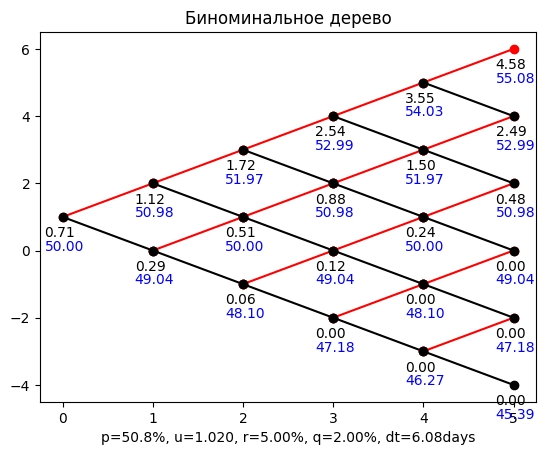

European Call Price: 0.71


In [119]:
european_call_price = binomial_tree_pricer_2(r, q, sigma, T, n, S, K, option_type='european_call', american=False, showStatePrices=True)
print(f"European Call Price: {european_call_price:.2f}")

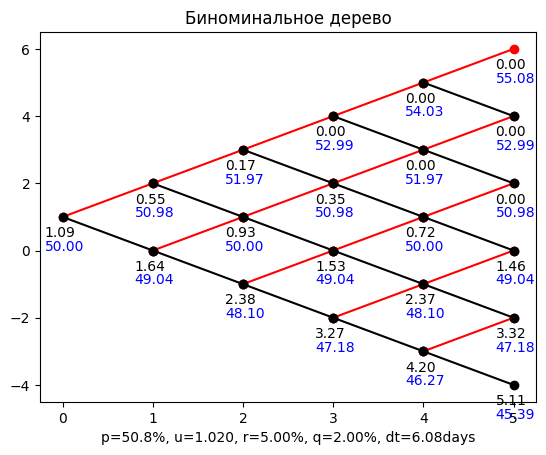

European Put Price: 1.09


In [120]:
european_put_price = binomial_tree_pricer_2(r, q, sigma, T, n, S, K, option_type='european_put', american=False, showStatePrices=True)
print(f"European Put Price: {european_put_price:.2f}")

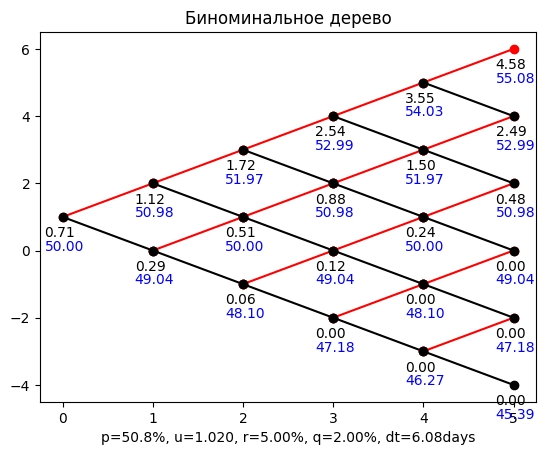

American Call Price: 0.71


In [121]:
american_call_price = binomial_tree_pricer_2(r, q, sigma, T, n, S, K, option_type='american_call', american=True, showStatePrices=True)
print(f"American Call Price: {american_call_price:.2f}")

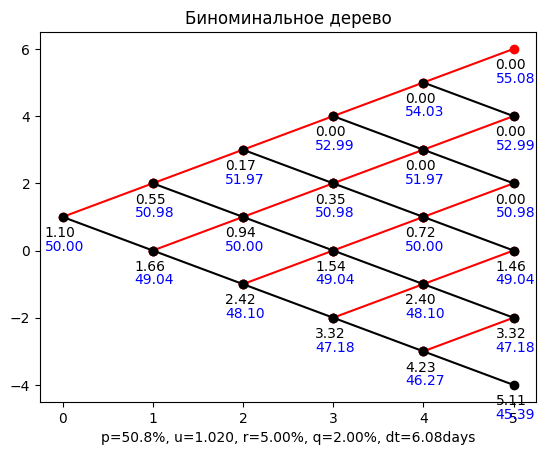

American Put Price: 1.10


In [122]:
american_put_price = binomial_tree_pricer_2(r, q, sigma, T, n, S, K, option_type='american_put', american=True, showStatePrices=True)
print(f"American Put Price: {american_put_price:.2f}")

# Модель Блека-Шоулза

Задача. Допустим, что условия модели Блека-Шоулза выполнены. Текущая цена бездивидентных акций равна 100, волатальность
5%, цена страйк 100, время до экспирации один год, безрисковая
ставка 5%.

Оцените справедливую стоимость опционов колл и пут и вычислите греческие характеристики для опционов как функцию от текущей цены базового актива.

In [123]:
r = 0.07
T = 1
K = 100
S0 = 100
sigma = 0.3
t = 0
q = 0
tau = T - t

## Задача (оценка и паритет)

In [124]:
# оценка опциона колл
def call(S, K, T, sigma, r, q):
    d1 = (np.log (S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp (-r * T) * norm.cdf(d2)

In [125]:
# оценка опциона пут
def put(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)

In [126]:
# оценка опциона пут с использованием паритета
def put_paritet(S, K, T, sigma, r, q):
    return call(S, K, T, sigma, r, q) + K * np.exp(-r * T) - S

Сравните результаты оценки опциона пут с/без паритета цен

In [127]:
q = 0.02
put_price = put(S0, K, T, sigma, r, q)
put_price_paritet = put_paritet(S0, K, T, sigma, r, q)

print(f"Оценка опциона пут: {put_price:.4f}")
print(f"Оценка опциона пут с использованием паритета: {put_price_paritet:.4f}")

if np.isclose(put_price, put_price_paritet):
    print("Оценки опциона пут совпадают.")
else:
    print("Оценки опциона пут не совпадают.")

Оценка опциона пут: 9.1444
Оценка опциона пут с использованием паритета: 7.1643
Оценки опциона пут не совпадают.


При q (ставка дивиденда) равной нулю, стоиомсти опциона пут с и без паритета цен ранвы, если q > 0, то не равны.

In [128]:
params = f"r = {r}, sigma = {sigma}, t = {t}, T = {T}, S0 = {S0}, K = {K}"
print('Параметры:', params)


call_price = call(S0, K, T, sigma, r, q)
print('Оценка опциона колл =', call_price)
put_price  =  put(S0, K, T, sigma, r, q)
print('Оценка опциона пут =', put_price)


Параметры: r = 0.07, sigma = 0.3, t = 0, T = 1, S0 = 100, K = 100
Оценка опциона колл = 13.924872399049242
Оценка опциона пут = 9.14438705896854


## Задача (греческие характеристики)

Вспомогательные функции для аналитического вычисления греческих характеристик.

In [139]:
def d_plus_(S, K, r, T):
    return (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

def d_minus_(S, K, r, T):
    return(np.log(S / K) + (r - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

def delta(S, K, T, sigma, r):
    d_plus = d_plus_(S, K, r, T)
    return norm.cdf(d_plus) # производная по S

def gamma(S, K, T, sigma, r):
    d_plus = d_plus_(S, K, r, T)
    return norm.pdf(d_plus) / (S * sigma * np.sqrt(T)) # вторая производная по S (скорость изменения дельты)

def theta(S, K, T, sigma, r):
    d_plus = d_plus_(S, K, r, T)
    d_minus = d_minus_(S, K, r, T)
    return -r * K * np.exp(-r * T) * norm.cdf(d_minus) - (sigma * S / (2 * np.sqrt(T))) * norm.pdf(d_plus) # производная по t ("затухание по времени")

def kappa(S, K, T, sigma, r):
    d_minus = d_minus_(S, K, r, T)
    return - np.exp(-r * T) * norm.pdf(d_minus) # производная дельты по S (измеряет мгновенную скорость изменения дельты с течением времени)

def vega(S, K, T, sigma, r):
    d_plus = d_plus_(S, K, r, T)
    return S * np.sqrt(T) / np.sqrt(2*np.pi) * np.exp(-0.5 * d_plus**2 ) # производная по sigma (чуствительность к волатильности)

def ro(S, K, T, sigma, r):
    d_minus = d_minus_(S, K, r, T)
    return T * S * np.exp(-r * T) * norm.pdf(d_minus) # производная по r 

Графики зависимости греческих характеристик для опционов от цены базового актива.

In [140]:
# N = 1000
# x_data = np.linspace(S0 - S0/4, S0+S0/4, N)
# cp_data = np.zeros((6, N))

# # ваш код

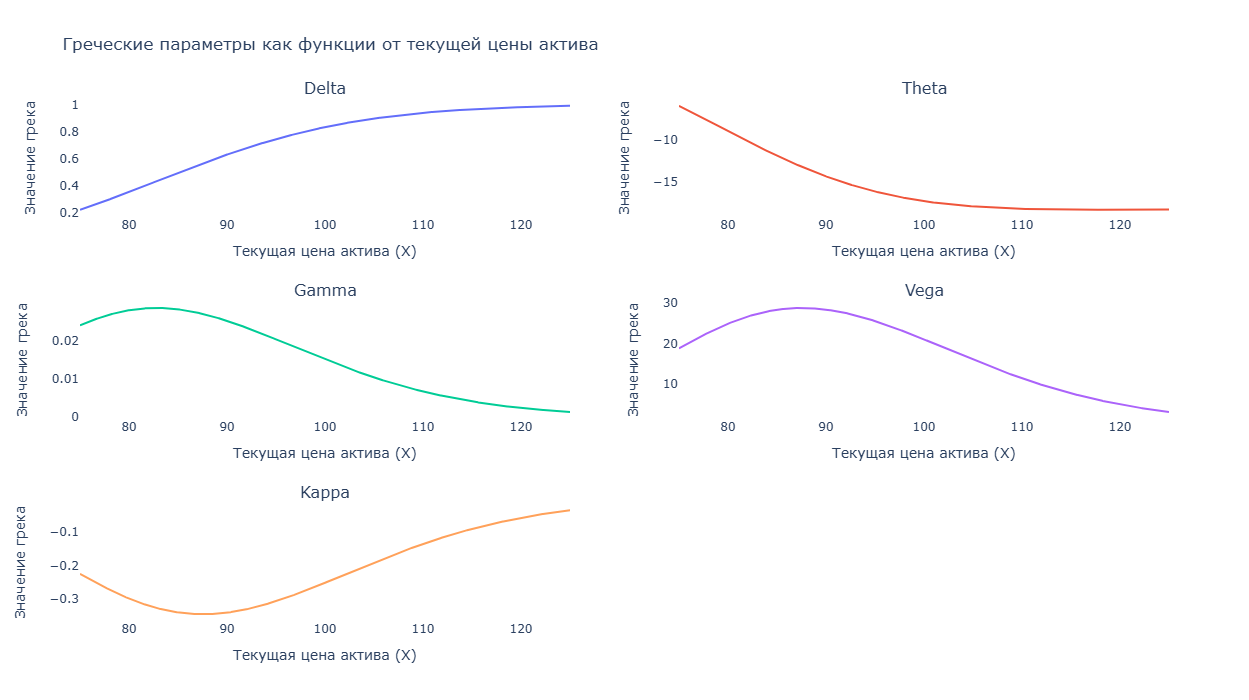

delta - измеряет скорость изменения теоретической стоимости опциона по отношению к изменениям цены базового актива
gamma - измеряет скорость изменения дельты по отношению к изменениям базовой цены
theta - измеряет чувствительность стоимости производной к течению времени: "затухание во времени"
vega - измеряет чувствительность к волатильности
r - измеряет чувствительность к процентной ставке


In [141]:
S0 = 100  
K = 100   
r = 0.21   
sigma = 0.2 
T = 1      
t = 0.3   
N = 1000

x_data = np.linspace(S0 - S0 / 4, S0 + S0 / 4, N)

delta_vals = delta(x_data, K, T-t, sigma, r)
gamma_vals = gamma(x_data, K, T-t, sigma, r)
theta_vals = theta(x_data, K, T-t, sigma, r)
vega_vals = vega(x_data, K, T-t, sigma, r)
kappa_vals = kappa(x_data, K, T-t, sigma, r)

cp_data = np.zeros((6, N))
cp_data[0] = delta_vals
cp_data[1] = gamma_vals
cp_data[2] = theta_vals
cp_data[3] = vega_vals
cp_data[4] = kappa_vals


fig = make_subplots(rows=3, cols=2,
                    subplot_titles=('Delta', 'Theta', 'Gamma', 'Vega', 'Kappa'))

fig.add_trace(go.Scatter(x=x_data, y=delta_vals, mode='lines', name='Delta'), row=1, col=1)
fig.add_trace(go.Scatter(x=x_data, y=theta_vals, mode='lines', name='Theta'), row=1, col=2)
fig.add_trace(go.Scatter(x=x_data, y=gamma_vals, mode='lines', name='Gamma'), row=2, col=1)
fig.add_trace(go.Scatter(x=x_data, y=vega_vals, mode='lines', name='Vega'), row=2, col=2)
fig.add_trace(go.Scatter(x=x_data, y=kappa_vals, mode='lines', name='Kappa'), row=3, col=1)

fig.update_layout(
    title='Греческие параметры как функции от текущей цены актива',
    plot_bgcolor='rgba(0,0,0,0)',
    showlegend=False,
    width=1000,
    height=700
)

for i in range(1, 4):
    fig.update_xaxes(title_text='Текущая цена актива (X)', row=i)
    fig.update_yaxes(title_text='Значение грека', row=i)

fig.show()

print('delta - измеряет скорость изменения теоретической стоимости опциона по отношению к изменениям цены базового актива')
print('gamma - измеряет скорость изменения дельты по отношению к изменениям базовой цены')
print('theta - измеряет чувствительность стоимости производной к течению времени: "затухание во времени"')
print('vega - измеряет чувствительность к волатильности')
print('r - измеряет чувствительность к процентной ставке')


## - Задача. Вычислите греческие коэффициенты численно и сравните результаты.

```
def first_derivative(f, x, h=0.001):
    return (f(x + h) - f(x - h)) / (2 * h)

def second_derivative(f, x, h=0.001):
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h * h)
```




In [142]:
# Численные производные 
def first_derivative(f, x, h=0.001): 
    return (f(x + h) - f(x - h)) / (2 * h) 
 
def second_derivative(f, x, h=0.001): 
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h * h) 
 
 
# Оборачиваем функцию в фиксированные параметры 
def call_price_fixed(S_fixed): 
    return call(S_fixed, K, T, r, sigma, q=0) 
 
def call_price_theta(T_fixed): 
    return call(S, K, T_fixed, r, sigma, q=0) 
 
def call_price_vega(sigma_fixed): 
    return call(S, K, T, r, sigma_fixed, q=0) 
 
def call_price_rho(r_fixed): 
    return call(S, K, T, r_fixed, sigma, q=0) 


In [143]:
S = 100  
K = 100  
T = 1.0   
r = 0.07
sigma = 0.3  


delta_numeric = first_derivative(call_price_fixed, S) 
gamma_numeric = second_derivative(call_price_fixed, S) 
theta_numeric = first_derivative(call_price_theta, T) 
vega_numeric = first_derivative(call_price_vega, sigma) 
rho_numeric = first_derivative(call_price_rho, r) 

delta_numeric, gamma_numeric, theta_numeric, vega_numeric, rho_numeric

(0.9999922237540204,
 5.030642569181509e-06,
 22.224433513613917,
 74.0810445843536,
 0.0035582302402303867)

In [144]:
class BlackScholesGreeks: 
    def __init__(self, K, r, sigma): 
        self.K = K 
        self.r = r 
        self.sigma = sigma 
 
    def delta_call(self, S, T): 
        d1 = (np.log(S / self.K) + (self.r + 0.5 * self.sigma**2) * T) / (self.sigma * np.sqrt(T)) 
        return norm.cdf(d1) 
 
    def delta_put(self, S, T): 
        d1 = (np.log(S / self.K) + (self.r + 0.5 * self.sigma**2) * T) / (self.sigma * np.sqrt(T)) 
        return norm.cdf(d1) - 1 
 
    def gamma(self, S, T): 
        d1 = (np.log(S / self.K) + (self.r + 0.5 * self.sigma**2) * T) / (self.sigma * np.sqrt(T)) 
        return norm.pdf(d1) / (S * self.sigma * np.sqrt(T)) 
 
    def theta_call(self, S, T): 
        d1 = (np.log(S / self.K) + (self.r + 0.5 * self.sigma**2) * T) / (self.sigma * np.sqrt(T)) 
        d2 = d1 - self.sigma * np.sqrt(T) 
        term1 = -(S * norm.pdf(d1) * self.sigma) / (2 * np.sqrt(T)) 
        term2 = -self.r * self.K * np.exp(-self.r * T) * norm.cdf(d2) 
        return term1 + term2 
 
    def theta_put(self, S, T): 
        d1 = (np.log(S / self.K) + (self.r + 0.5 * self.sigma**2) * T) / (self.sigma * np.sqrt(T)) 
        d2 = d1 - self.sigma * np.sqrt(T) 
        term1 = -(S * norm.pdf(d1) * self.sigma) / (2 * np.sqrt(T)) 
        term2 = self.r * self.K * np.exp(-self.r * T) * norm.cdf(-d2) 
        return term1 + term2 
 
    # def plot_3d(self, S_range, T_range, greek_function, title, cmap='sunsetdark'):

    #     S_grid, T_grid = np.meshgrid(S_range, T_range)
    #     Z = greek_function(S_grid, T_grid)
    
    #     fig = go.Figure(data=[go.Surface(z=Z, x=S_grid, y=T_grid, colorscale=cmap)])
    
    #     fig.update_layout(title=title,
    #                       scene=dict(
    #                           xaxis_title='Price of Underlying Asset (S)',
    #                           yaxis_title='Time to Expiry (T)',
    #                           zaxis_title='Value'),
    #                       width=800,
    #                       height=600)
    
    #     fig.show()
    def plot_3d(self, S_range, T_range, greek_function, title): 
     
        S_grid, T_grid = np.meshgrid(S_range, T_range) 
        Z = greek_function(S_grid, T_grid) 
 
        fig = plt.figure(figsize=(10, 6)) 
        ax = fig.add_subplot(111, projection='3d') 
        ax.plot_surface(S_grid, T_grid, Z, cmap='viridis', edgecolor='none') 
        ax.set_title(title) 
        ax.set_xlabel('Price of Underlying Asset (S)') 
        ax.set_ylabel('Time to Expiry (T)') 
        ax.set_zlabel('Value') 
        plt.show() 



Задача. Постройте график трехмерной поверхности для описания зависимости греческих коэффициентов опциона  
*   кол,
*   пут

от стоимости базового актива и
количества дней до экспирации.

In [145]:
K = 100 
r = 0.05 
sigma = 0.2 
model = BlackScholesGreeks(K, r, sigma) 
 
S_range = np.linspace(50, 150, 50) 
T_range = np.linspace(0.01, 1.0, 50) 


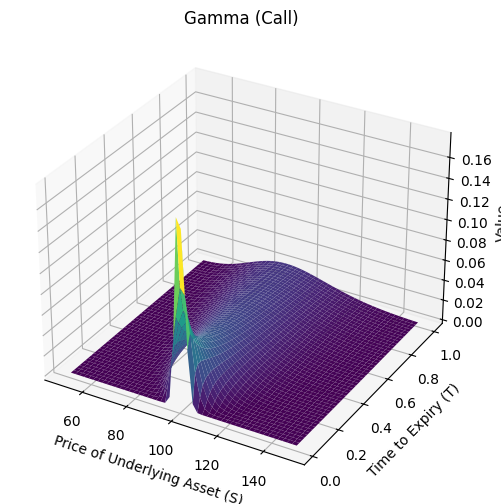

In [146]:
model.plot_3d(S_range, T_range, model.gamma, "Gamma (Call)") 

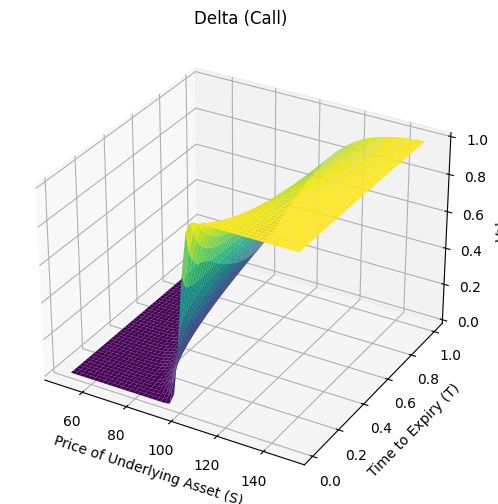

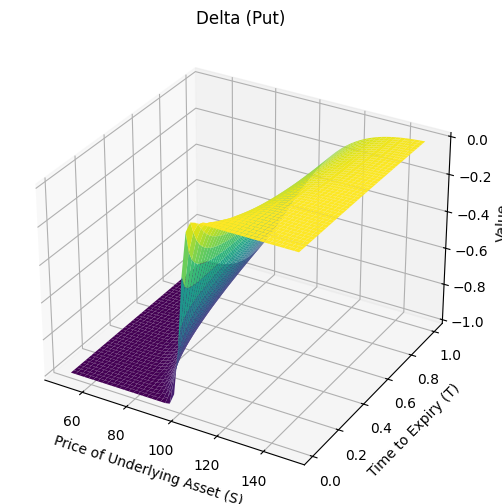

In [137]:
model.plot_3d(S_range, T_range, model.delta_call, "Delta (Call)") 
model.plot_3d(S_range, T_range, model.delta_put, "Delta (Put)")

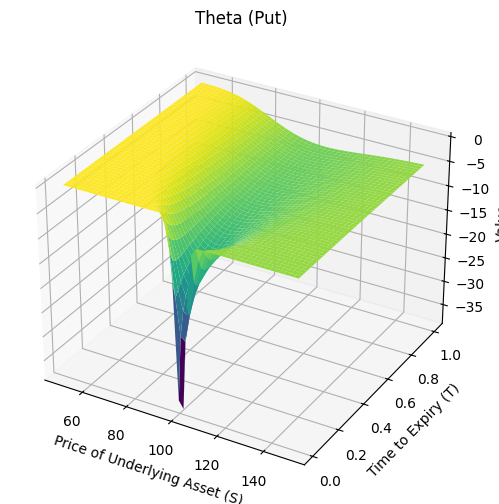

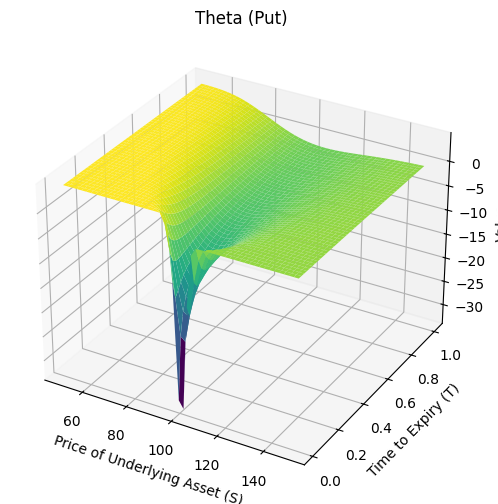

In [138]:
model.plot_3d(S_range, T_range, model.theta_call, "Theta (Put)")
model.plot_3d(S_range, T_range, model.theta_put, "Theta (Put)")

# Опционная стратегия

## Задача (по вариантам)

Задача. С использование досок опционов [Nasdaq](https://www.nasdaq.com/market-activity/stocks/aapl/option-chain) или [MOEX](https://www.moex.com/ru/derivatives/optionsdesk.aspx) выберите ликвидный актив и реализуейте две [опционных стратегий](https://www.option.ru/glossary/strategy),
$i$ и $i+12$, где $i$ -- ваша фамилия по алфавиту:

1.   Покупка опциона колл. Long Call
1. Продажа опциона колл. Short Call
1. Покупка опциона пут. Long Put
1. Продажа опциона пут. Short Put
1. Бычий колл спрэд. Bull Call Spread
1. Бычий пут спрэд. Bull Put Spread
1. Медвежий колл спрэд. Bear Call Spread
1. Медвежий пут спрэд. Bear Put Spread
1. Покупка бабочки. Long Butterfly
1. Продажа бабочки. Short Butterfly
1. Покупка кондора. Long Condor
1. Продажа кондора. Short Condor
1. Покупка стрэддла. Long Straddle
1. Продажа стрэддла. Short Straddle
1. Покупка стрэнгла. Long Strangle
1. Продажа стрэнгла. Short Strangle
1. Пропорциональный колл спрэд. Call Ratio Spread
1. Пропорциональный пут спрэд. Put Ratio Spread
1. Пропорциональный обратный колл спрэд. Call Ratio Backspread
1. Пропорциональный обратный пут спрэд. Put Ratio Backspread
1. Синтетический длинный фьючерс. Synthetic Long Futures
1. Синтетический короткий фьючерс. Synthetic Short Futures
1. Стрэп. Strap
1. Стрип. Strip
1. Обратный бычий спрэд. Bull Backspread
1. Обратный медвежий спрэд. Bear Backspread

Проанализируйте как влияет соотношение  спот цены базового актива $S$ и цены страйк $K$ для

опциона call:

*   $S > K$ -- в деньгах (in the money),   
*   $S = K$ -- около денег (at the money),
*   $S < K$ --  вне денег (out of the money) и

опциона put:
*   $S < K$ -- в деньгах (in the money),
*   $S = K$ -- около денег (at the money),  
*   $S > K$ -- вне денег (out of the money).

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии.

Постройте график функции выплат для каждой опционной стратегии.

1. Покупка бабочки. Long Butterfly
1. Синтетический длинный фьючерс. Synthetic Long Futures


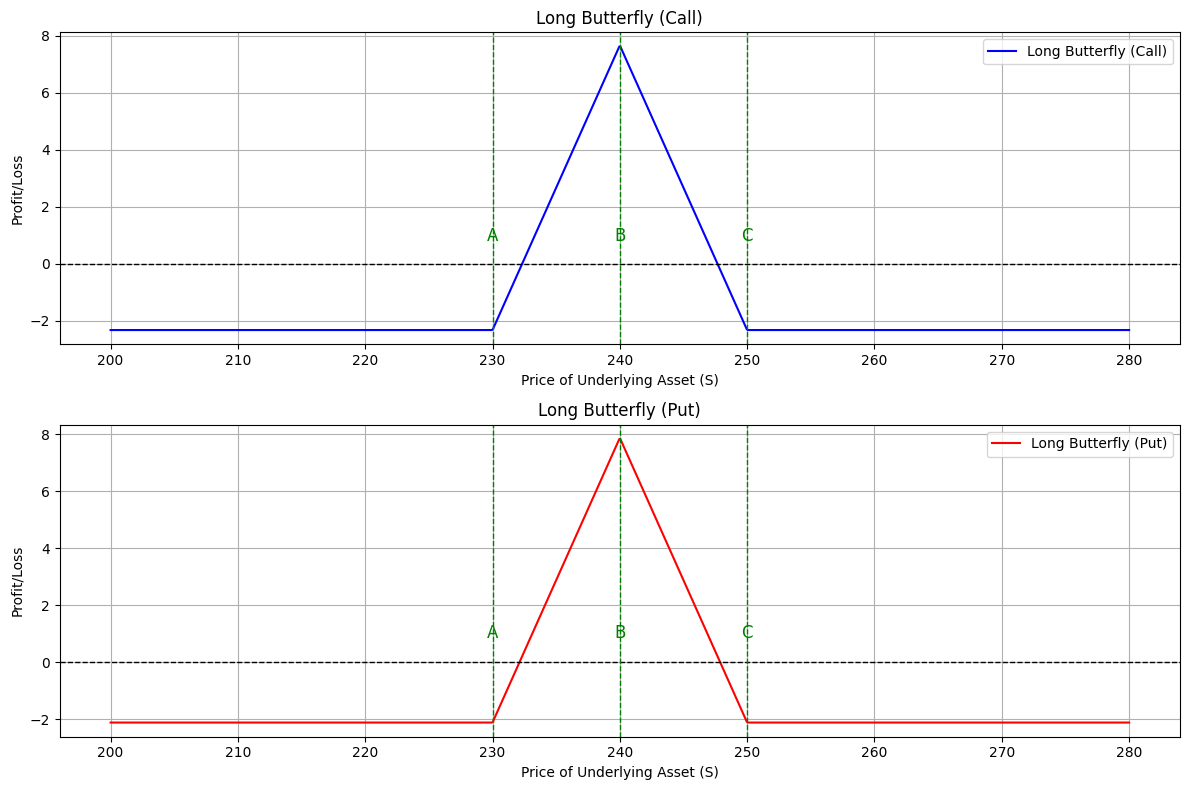

In [92]:
def call_payoff(S, K, premium):
    return np.maximum(S - K, 0) - premium

def put_payoff(S, K, premium):
    return np.maximum(K - S, 0) - premium

# AAPL asset = 229.56 $

S = np.linspace(200, 280, 1000)  # Возможные цены базового актива
strike_prices = [230, 240, 250]  # Страйки A, B, C

# Премии для колл-опционов
premiums_call = [2.76,0.23, 0.03]  # Премии для колл-опционов

# Премии для пут-опционов
premiums_put = [2.82, 10.60, 20.50]  # Премии для пут-опционов

# Выплаты для Long Butterfly (Колл)
payoff_call_A = call_payoff(S, strike_prices[0], premiums_call[0])  # Лонг колл A
payoff_call_B = -2 * call_payoff(S, strike_prices[1], premiums_call[1])  # Шорт 2 колл B
payoff_call_C = call_payoff(S, strike_prices[2], premiums_call[2])  # Лонг колл C
butterfly_call = payoff_call_A + payoff_call_B + payoff_call_C

# Выплаты для Long Butterfly (Пут)
payoff_put_A = put_payoff(S, strike_prices[0], premiums_put[0])  # Лонг пут A
payoff_put_B = -2 * put_payoff(S, strike_prices[1], premiums_put[1])  # Шорт 2 пут B
payoff_put_C = put_payoff(S, strike_prices[2], premiums_put[2])  # Лонг пут C
butterfly_put = payoff_put_A + payoff_put_B + payoff_put_C

# Построение графиков
plt.figure(figsize=(12, 8))

# Butterfly для колл
plt.subplot(2, 1, 1)
plt.plot(S, butterfly_call, label="Long Butterfly (Call)", color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
for strike, label in zip(strike_prices, ['A', 'B', 'C']):
    plt.axvline(strike, color='green', linestyle='--', linewidth=1)
    plt.text(strike, plt.ylim()[1] * 0.1, label, color='green', fontsize=12, ha='center')

plt.title("Long Butterfly (Call)")
plt.xlabel("Price of Underlying Asset (S)")
plt.ylabel("Profit/Loss")
plt.legend()
plt.grid()

# Butterfly для пут
plt.subplot(2, 1, 2)
plt.plot(S, butterfly_put, label="Long Butterfly (Put)", color='red')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
for strike, label in zip(strike_prices, ['A', 'B', 'C']):
    plt.axvline(strike, color='green', linestyle='--', linewidth=1)
    plt.text(strike, plt.ylim()[1] * 0.1, label, color='green', fontsize=12, ha='center')

plt.title("Long Butterfly (Put)")
plt.xlabel("Price of Underlying Asset (S)")
plt.ylabel("Profit/Loss")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

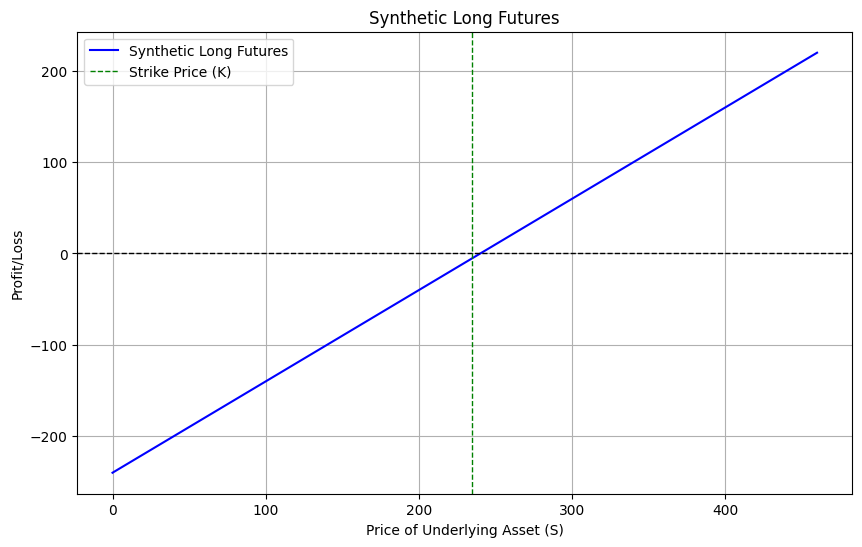

In [95]:
def synthetic_long_futures(S, K, premium_call, premium_put):

    payoff_call = np.maximum(S - K, 0) - premium_call  # Лонг колл
    payoff_put = -(np.maximum(K - S, 0) - premium_put)  # Шорт пут
    return payoff_call + payoff_put

# Параметры
S = np.linspace(0, 460, 1000)  # Возможные цены базового актива
K = 235  # Цена исполнения
premium_call = 6.10  # Премия за колл
premium_put = 0.91  # Премия за пут

# Расчет выплат
payoff = synthetic_long_futures(S, K, premium_call, premium_put)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(S, payoff, label="Synthetic Long Futures", color="blue")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.axvline(K, color="green", linestyle="--", linewidth=1, label="Strike Price (K)")

plt.title("Synthetic Long Futures")
plt.xlabel("Price of Underlying Asset (S)")
plt.ylabel("Profit/Loss")
plt.legend()
plt.grid()
plt.show()

## Задача (оптимальный набор)

Задача. С использование доски опционов [Nasdaq](https://www.nasdaq.com/market-activity/stocks/aapl/option-chain) найдите оптимальный набор опционных контрактов $$
X=\{X_c, X_p\},
$$
где
$$
X_c=\{x_i^c \in
\mathbb{Z}: L\le x_i^c \le U, i \in I\},
$$
$$
X_p=\{x_i^p
\in \mathbb{Z}: L \le x_i^p \le U, i \in I\},
$$
здесь
$x_i^c$, $x_i^p>0$ -- количество опционов колл и пут для покупки, $x_i^c$, $x_i^p<0$ -- для продажи. Если
$x_i^c=0$ или $x_i^p=0$, то $i$-ый контракт
не входит в портфель, $L<0$ и $U>0$ -- нижняя и верхняя границы количества контрактов в портфеле соответственно,
$I=\{1,2, \ldots, n\}$ -- набор индексов.

При разработке стратегии придерживаться следующих преположений
*   покупки и продажи опционов можно осуществлять по ask- и bid-ценам,
*   можно занимать короткие и длинные позиции с учетом ликвидности контракта,
*  стратегия должна иметь защиту от падения и роста цен страйк на $x$\% от стоимости базового актива в момент времени $T$,
*  максимальный убыток стратегии ограничен величиной $\mathcal{L}$, равной $y$% от стоимости базового актива в момент времени $t=0$
*  стратегия имеет начальную стоимость $C(t,X)$, равную $w$ условных единиц капитала.

https://arxiv.org/pdf/1707.02087

In this study we propose the strategy which involves European call and put options on the same underlying asset
 with the same maturity date T, but di erent strikes in a series. 

In [84]:
import cvxpy as cp

In [85]:
def optimize_option_portfolio(option_call, option_put, S0, x_pct, y_pct, budget, L, U):
    """
    Оптимизация портфеля опционов.
    """
    strikes_call = np.array(option_call['strike'])
    strikes_put = np.array(option_put['strike'])
    ask_call = np.array(option_call['ask_call'])
    bid_call = np.array(option_call['bid_call'])
    ask_put = np.array(option_put['ask_put'])
    bid_put = np.array(option_put['bid_put'])

    # допустимые изменения цены базового актива
    ST_up = S0 * (1 + x_pct)  
    ST_down = S0 * (1 - x_pct)  

    # максимальный убыток
    L_max = y_pct * S0

    # === Определение переменных ===
    n_call = len(strikes_call)
    n_put = len(strikes_put)
    
    x_c = cp.Variable(n_call, integer=True)  
    x_p = cp.Variable(n_put, integer=True)  

    # === Целевая функция ===
    profit_call_up = cp.sum(cp.multiply(x_c, cp.pos(ST_up - strikes_call)))  # Рост
    profit_call_down = cp.sum(cp.multiply(x_c, cp.pos(ST_down - strikes_call)))  # Падение

    profit_put_up = cp.sum(cp.multiply(x_p, cp.pos(strikes_put - ST_up)))  # Рост
    profit_put_down = cp.sum(cp.multiply(x_p, cp.pos(strikes_put - ST_down)))  # Падение

    payoff_up = profit_call_up + profit_put_up  # Профиль при росте цены
    payoff_down = profit_call_down + profit_put_down  # Профиль при падении цены

    # стоимость стратегии
    cost_call = cp.sum(cp.multiply(x_c, ask_call))
    cost_put = cp.sum(cp.multiply(x_p, ask_put))
    cost = cost_call + cost_put

    # === Ограничения ===
    constraints = [
        cost <= budget,  
        x_c >= L, x_c <= U,  
        x_p >= L, x_p <= U,  
        payoff_up >= -L_max,  
        payoff_down >= -L_max  
    ]

    # === Оптимизация ===
    objective = cp.Maximize((payoff_up + payoff_down) / 2 - cost)  # Средняя прибыль - затраты
    problem = cp.Problem(objective, constraints)
    problem.solve()

    # === Результаты ===
    return {
        "optimal_call": x_c.value,
        "optimal_put": x_p.value,
        "total_cost": cost.value,
        "payoff_up": payoff_up.value,
        "payoff_down": payoff_down.value,
        "average_payoff": (payoff_up.value + payoff_down.value) / 2,
    }


In [86]:
# https://www.nasdaq.com/market-activity/stocks/tsla/option-chain
# asset = TSLA
option_call = {
    "strike": [312.50, 317.50, 322.50, 327.50, 332.50, 337.50, 342.50, 347.50, 352.50, 357.50, 362.50, 367.50, 372.50, 377.50],      
    "ask_call": [34.85, 30.25, 25.80, 21.60, 17.70, 14.20, 11.20, 8.70, 6.65, 5.05, 3.80, 2.81, 2.09, 1.55],
    "bid_call": [34.05,29.55, 25.10, 20.90, 17.35, 13.90, 11.00, 8.50, 6.50, 4.90, 3.65, 2.72, 2.03, 1.49]
}

option_put = {
    "strike": [315.00, 320.00, 325.00, 330.00, 335.00, 340.00, 345.00, 350.00, 355.00, 360.00, 365.00, 370.00, 375.00, 380.00],
    "ask_put": [1.00, 1.49, 2.20, 3.20, 4.55, 6.40, 8.65, 11.45, 14.70, 18.30, 22.25, 26.95, 31.35, 35.80],
    "bid_put": [0.97, 1.44, 2.14, 3.10, 4.45, 6.25, 8.50, 11.25, 14.40, 17.95, 21.85, 25.40, 29.80, 34.70]
}

S0 = 346   
x_pct = 0.15   
y_pct = 0.05   
budget = 270   
L = -7
U = 10

result = optimize_option_portfolio(option_call, option_put, S0, x_pct, y_pct, budget, L, U)

print("Оптимальные контракты (Call):", result["optimal_call"])
print("Оптимальные контракты (Put):", result["optimal_put"])
print("Общая стоимость стратегии:", result["total_cost"])
print("Прибыль при росте цены:", result["payoff_up"])
print("Прибыль при падении цены:", result["payoff_down"])
print("Средняя прибыль:", result["average_payoff"])



Оптимальные контракты (Call): [-7. -7. -7. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
Оптимальные контракты (Put): [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. -5. -7. -7. -7.]
Общая стоимость стратегии: 266.65
Прибыль при росте цены: 3305.5999999999985
Прибыль при падении цены: 2286.600000000003
Средняя прибыль: 2796.100000000001
